In [13]:
import sys,os
sys.path.append("../")
sys.path.append("../../../generate_apodized_mask/")
import py_qu2eb
import pymain
import healpy as h
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
mask=h.read_map("../datain/mask_gal70_nside512.fits",verbose=False)
mask[mask>0.99]=1. ; mask[mask<=0.99]=0.
nside=h.get_nside(mask) ; npixtot=h.nside2npix(nside)

In [39]:
apomask=pymain.gen_apodized_mask(mask,nside,1,0.,0.,780.,npixtot)

<IPython.core.display.Javascript object>


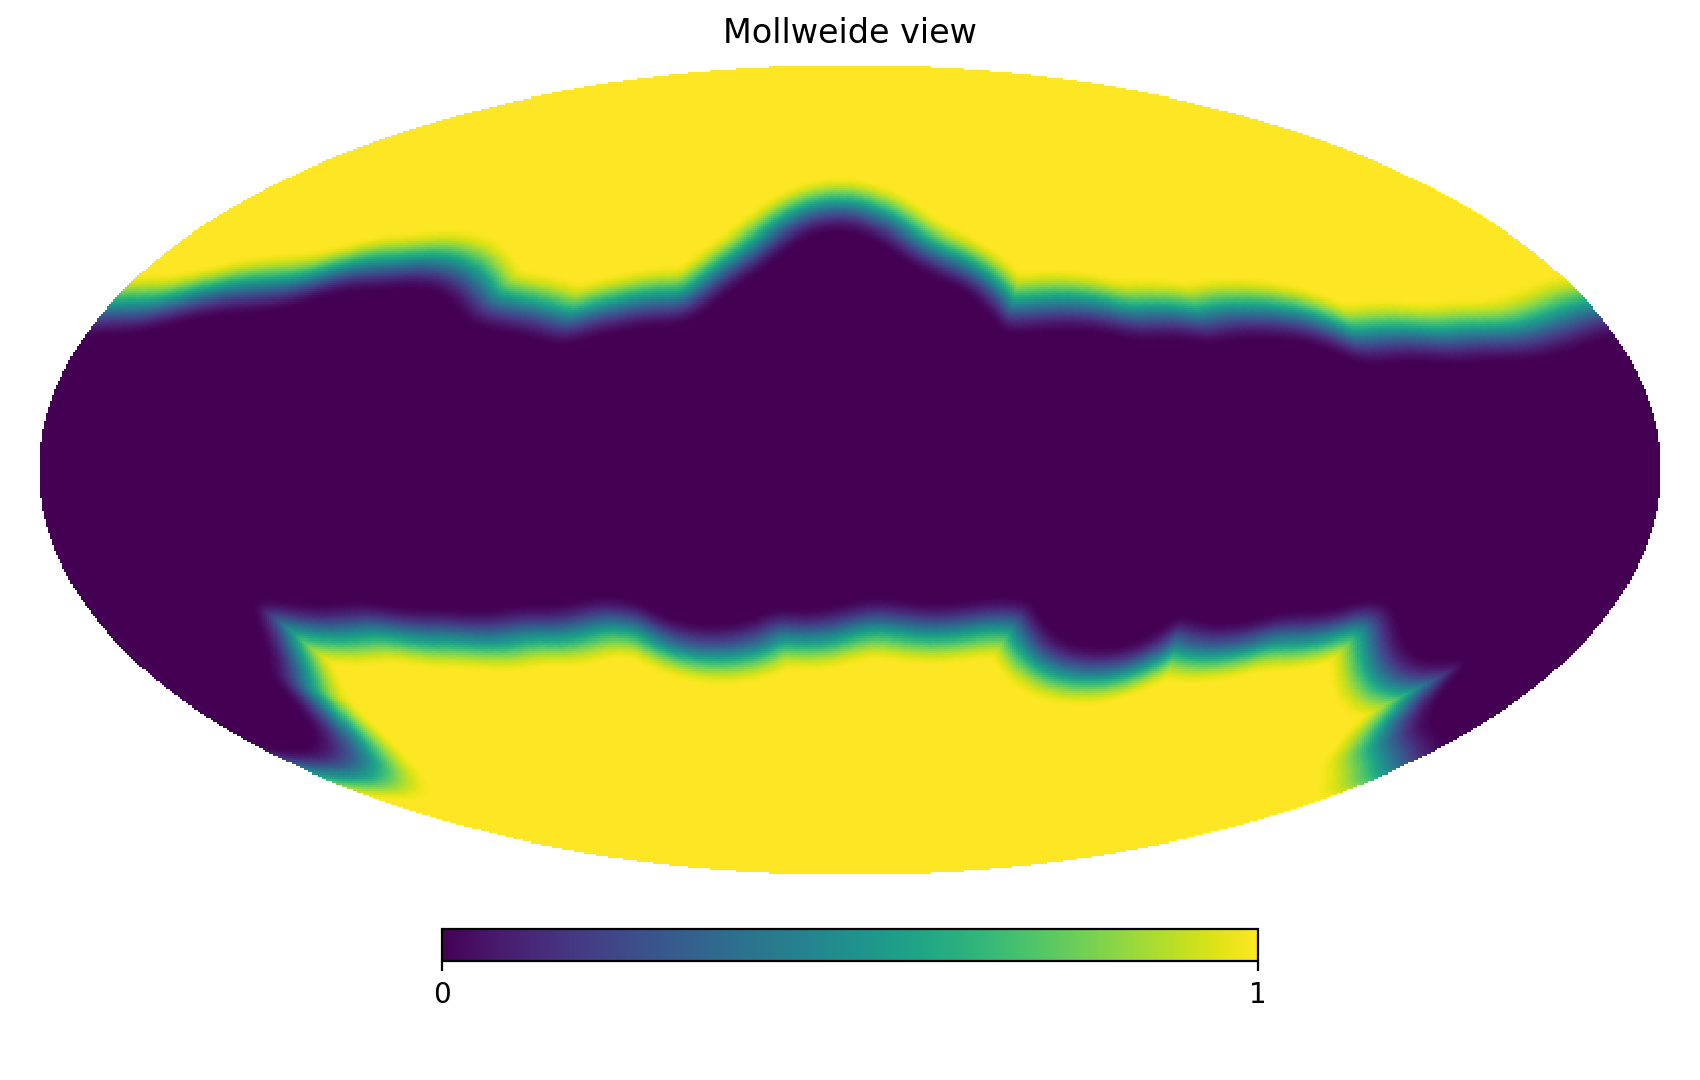

In [40]:
h.mollview(apomask)

In [41]:
TQU=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TQU=transpose(TQU)

In [42]:
TEB=py_qu2eb.get_teb(TQU,apomask,nside,1,npixtot)
TEB=transpose(TEB)

<IPython.core.display.Javascript object>


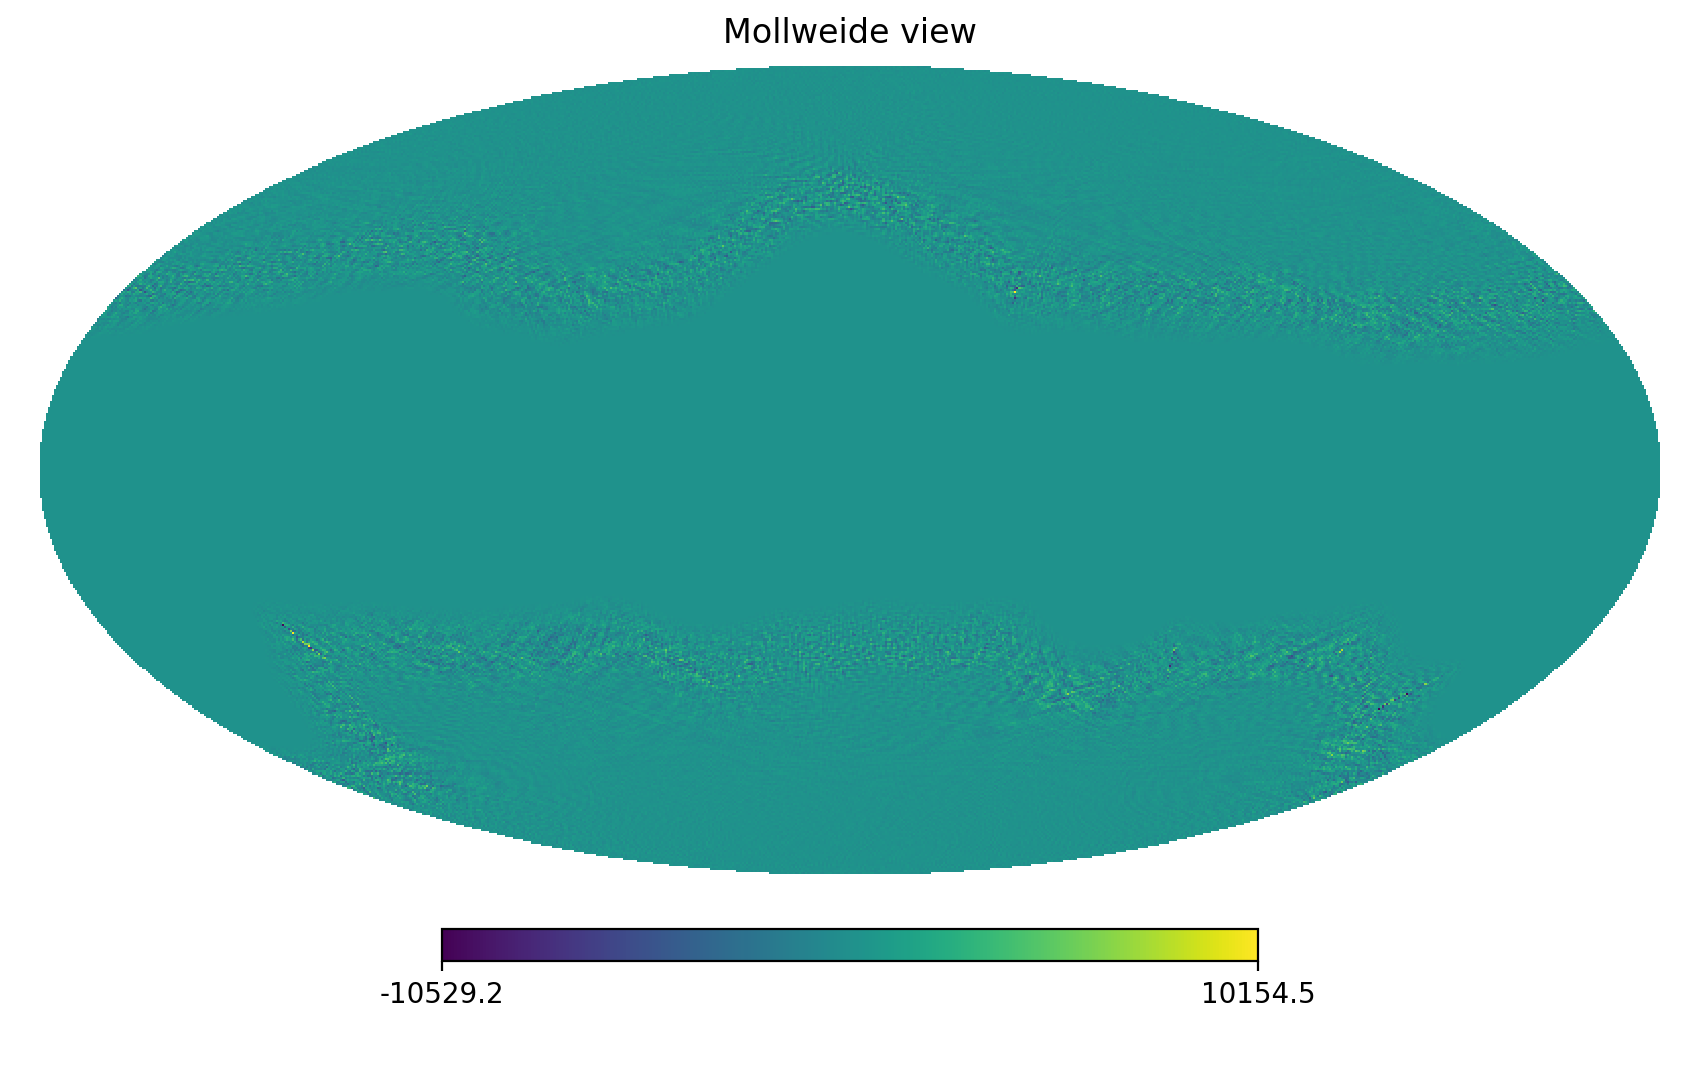

In [45]:
h.mollview(TEB[2,:])

In [46]:
m=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TEB0_alm=h.map2alm(m,lmax=1024,pol=True)
# TEB0=h.alm2map(TEB0_alm,512,pol=False,verbose=False)
clb0=h.alm2cl(TEB0_alm[2])

m=h.read_map("../datain/map.fits",(0,1,2),verbose=False)
TEB1_alm=h.map2alm(m*apomask,lmax=1024,pol=True)
# TEB1=h.alm2map(TEB1_alm,512,pol=False,verbose=False)
clb1=h.alm2cl(TEB1_alm[2])

TEB_alm=h.map2alm(TEB*apomask,lmax=1024,pol=True)
clb=h.alm2cl(TEB_alm[2])


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


<IPython.core.display.Javascript object>


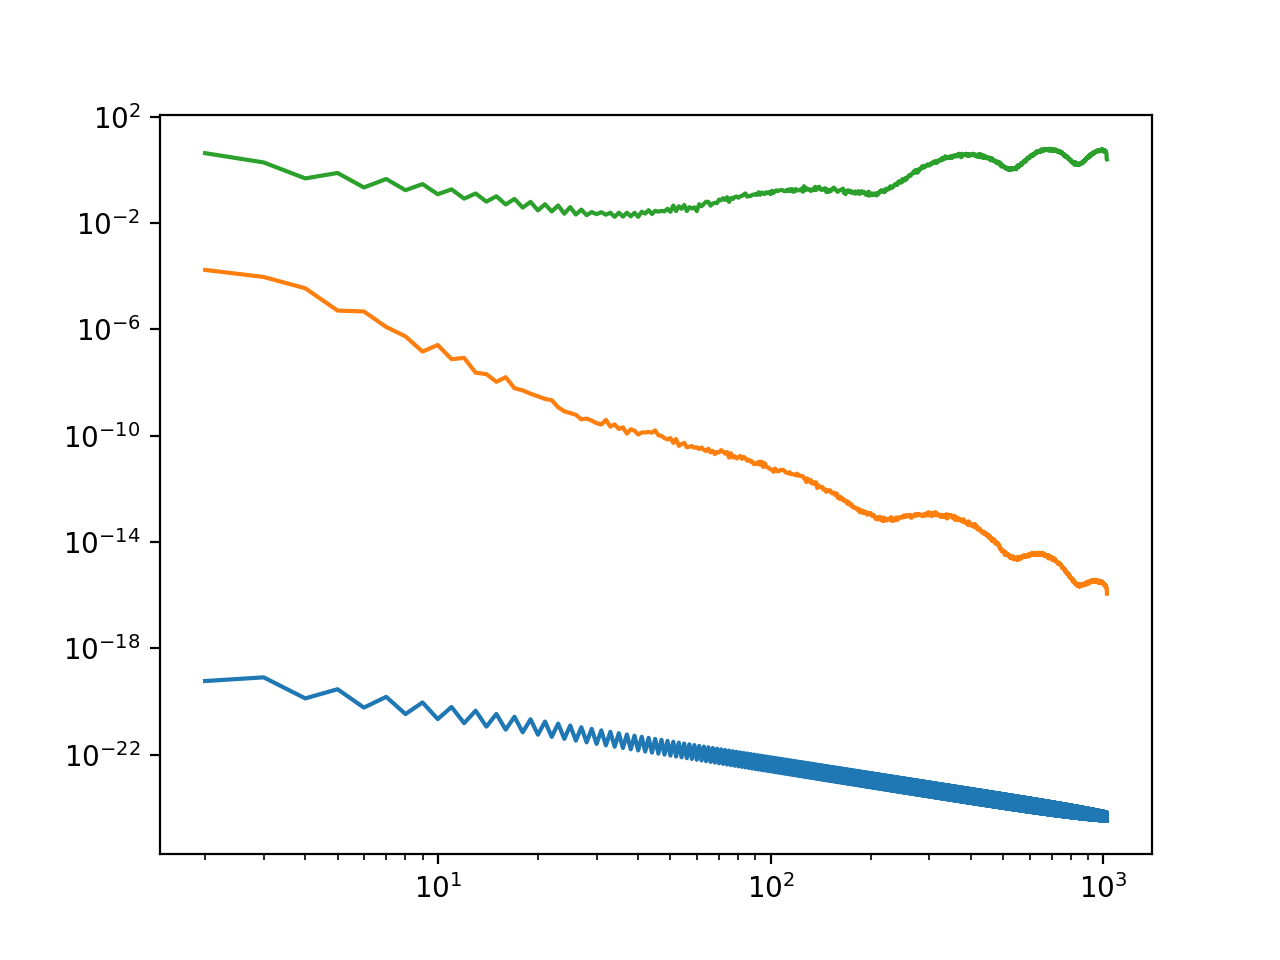

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


[]

In [48]:
ell=arange(1025)
f=1./((2.*pi)*((ell+2.)*(ell-1.)))
figure()
plot(ell,f*clb0)
plot(ell,f*clb1)
plot(ell,f*clb)
loglog()